## Final Notebook Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
housing_df['datetime'] = pd.to_datetime(housing_df['date'])
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [5]:
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [6]:
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['Basement'] = None
housing_df['Basement'] = housing_df['sqft_basement'].map(lambda x: False if x == 0 else True)
housing_df['Basement'] = housing_df['Basement'].astype(int)

In [7]:
# replace_dict = {0.75: 1, 1.75: 2, 2.75: 3, 3.75: 4, 4.75: 5, 5.75: 6, 6.75: 7, 7.75: 8, 
#                 1.25: 1.5, 2.25: 2.5, 3.25: 3.5, 4.25: 4.5, 5.25: 5.5, 6.25: 6.5}
# housing_df['bathrooms'] = housing_df['bathrooms'].replace(replace_dict)

In [8]:
housing_df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [9]:
replace_dict2 = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
housing_df['condition'] = housing_df['condition'].replace(replace_dict2)

In [10]:
from sklearn.impute import SimpleImputer
wtr_col = housing_df[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_df.waterfront = waterfront_imputed

In [11]:
from sklearn.preprocessing import OrdinalEncoder
wtr_col = housing_df[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_df.waterfront = encoded_wtr

In [12]:
from sklearn.impute import SimpleImputer
view_col = housing_df[['view']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer.fit(view_col)
view_imputed = imputer.transform(view_col)
housing_df.view = view_imputed

In [13]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
datetime            0
soldyear            0
age_when_sold       0
grade_num           0
Basement            0
dtype: int64

In [14]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long', 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

In [15]:
housing_ols

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,age_when_sold,grade_num,Basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,NONE,3,98178,59,7,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,NONE,3,98125,63,7,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,NONE,3,98028,82,6,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,NONE,5,98136,49,7,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,NONE,3,98074,28,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,NONE,3,98103,5,8,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,NONE,3,98146,1,8,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,NONE,3,98144,5,7,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,NONE,3,98027,11,8,0


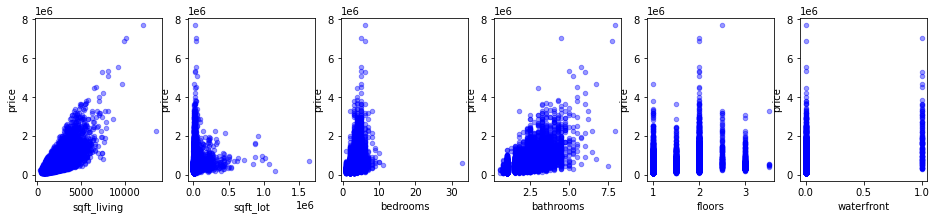

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'waterfront'], axes):
    housing_ols.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [17]:
correlation = housing_ols['price']. corr(housing_ols['grade_num']) 
correlation

0.6679507713876449

In [18]:
housing_ols.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,zipcode,age_when_sold,grade_num,Basement
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.023803,-0.008211,-0.021458,0.008188,0.002585
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,-0.053402,-0.053890,0.667951,0.180082
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,-0.154092,-0.155817,0.356563,0.162186
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,-0.204786,-0.507561,0.665838,0.162766
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,-0.199802,-0.318592,0.762779,0.204324
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,-0.129586,-0.052853,0.114731,-0.035227
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,-0.059541,-0.489514,0.458794,-0.256545
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.028923,0.024406,0.082818,0.040061
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,0.002888,0.360836,-0.146896,0.135211
zipcode,-0.008211,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,0.028923,0.002888,1.000000,0.347206,-0.185771,0.162861


In [19]:
# formula_price_grade = 'price ~C(grade_num) +sqft_living + C(bedrooms) + C(bathrooms) + sqft_lot+ C(floors) + C(waterfront) + C(condition) + C(zipcode) + age_when_sold + C(Basement)'
# formula_price_grade_model = ols(formula = formula_price_grade, data = housing_ols).fit()
# formula_price_grade_model_summary = formula_price_grade_model.summary()
# formula_price_grade_model_summary

In [20]:
housing_pred = housing_ols.copy()
bedrooms_ohe = housing_pred[['bedrooms']]
ohe_bedrooms = OneHotEncoder(categories ='auto', sparse =False)
ohe_bedrooms.fit(bedrooms_ohe)
ohe_bedrooms_encoded = ohe_bedrooms.transform(bedrooms_ohe)
bedrooms_encoded_ohe = pd.DataFrame(ohe_bedrooms_encoded, columns = ohe_bedrooms.categories_[0], index = housing_pred.index )
housing_pred1 = pd.concat([housing_pred, bedrooms_encoded_ohe ], axis =1)

In [21]:
# ohe_bedrooms_encoded = ohe_bedrooms.transform(bedrooms_ohe)
# bedrooms_encoded_ohe = pd.DataFrame(ohe_bedrooms_encoded, columns = ohe_bedrooms.categories_[0], index = housing_pred.index )
# housing_pred1 = pd.concat([housing_pred, bedrooms_encoded_ohe ], axis =1)

In [22]:
housing_pred1.drop(11, axis =1, inplace = True)
housing_pred1.drop(10, axis =1, inplace = True)
housing_pred1.drop(9, axis = 1, inplace =True)
housing_pred1.drop(33, axis = 1, inplace= True)

In [23]:
housing_pred1.rename(columns={1: "num_of_beds_1", 2: "num_of_beds_2",3: "num_of_beds_3", 4: "num_of_beds_4", 5: "num_of_beds_5", 6: "num_of_beds_", 7: "num_of_beds_7", 8: "num_of_beds_8"       }, inplace=True)

In [24]:
grade_num_ohe = housing_pred[['grade_num']]
ohe_grade_num = OneHotEncoder(categories ='auto', sparse =False)
ohe_grade_num.fit(grade_num_ohe)
ohe_grade_num_encoded = ohe_grade_num.transform(grade_num_ohe)
grade_num_encoded_ohe = pd.DataFrame(ohe_grade_num_encoded, columns = ohe_grade_num.categories_[0], index = housing_pred.index )
housing_pred2 = pd.concat([housing_pred1, grade_num_encoded_ohe], axis =1)

In [25]:
# ohe_grade_num_encoded = ohe_grade_num.transform(grade_num_ohe)
# grade_num_encoded_ohe = pd.DataFrame(ohe_grade_num_encoded, columns = ohe_grade_num.categories_[0], index = housing_pred.index )
# housing_pred2 = pd.concat([housing_pred1, grade_num_encoded_ohe], axis =1)


In [26]:
housing_pred2.rename(columns={1: "grade_of_home_1", 2: "grade_of_home_2",3: "grade_of_home_3", 4: "grade_of_home_4", 5: "grade_of_home_5", 6: "grade_of_home_6", 7: "grade_of_home_7", 8: "grade_of_home_8", 9: "grade_of_home_9", 10: "grade_of_home_10", 11: "grade_of_home_11", 12: "grade_of_home_12", 13: "grade_of_home_13"     }, inplace=True)

In [27]:
condition_ohe = housing_pred[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False)
cond_encoded_ohe = pd.DataFrame (ohe.fit_transform(condition_ohe))
cond_encoded_ohe.columns = ohe.get_feature_names(['condition'])
housing_pred3 = pd.concat([housing_pred2, cond_encoded_ohe], axis = 1)

In [28]:
housing_pred3.drop('condition', axis = 1, inplace=True)
housing_pred3.drop('grade_num', axis = 1, inplace=True)
housing_pred3.drop('bedrooms', axis = 1, inplace=True)

In [29]:
bathrooms_ohe = housing_pred[['bathrooms']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
bathrooms_transform = ohe.fit_transform(bathrooms_ohe)
bathrooms_encoded_ohe = pd.DataFrame(bathrooms_transform, columns=ohe.get_feature_names(['bathrooms']), index=housing_pred.index)
housing_pred4 = pd.concat([housing_pred3, bathrooms_encoded_ohe], axis = 1)

In [30]:
housing_pred4 = pd.concat([housing_pred3, bathrooms_encoded_ohe], axis = 1)

In [31]:
#housing_pred4.rename(columns={0.5: "num_of_bathrooms_.5", 1.0: "num_of_bathrooms_1.0",1.5: "num_of_bathrooms_1.5", 2.0: "num_of_bathrooms_2.0", 2.5: "num_of_bathrooms_2.5", 3.0: "num_of_bathrooms_3.0", 3.5: "num_of_bathrooms_3.5", 4.0: "num_of_bathrooms_4.0", 4.5: "num_of_bathrooms_4.5", 5.0: "num_of_bathrooms_5.0", 5.5: "num_of_bathrooms_5.5", 6.0: "num_of_bathrooms_6.0", 6.5: "num_of_bathrooms_6.5", 7.0: "num_of_bathrooms_7.0", 7.5: "num_of_bathrooms_7.5", 8.0 : "num_of_bathrooms_8.0"      }, inplace=True)

In [32]:
condition_ohe = housing_pred[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False)
cond_encoded_ohe = pd.DataFrame (ohe.fit_transform(condition_ohe))


In [33]:
view_ohe = housing_pred[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False)
ohe.fit(view_ohe)
view_encoded = ohe.transform(view_ohe)
view_encoded_ohe =pd.DataFrame(view_encoded, columns=ohe.categories_[0], index=housing_pred.index)

In [34]:
housing_pred5 = pd.concat([housing_pred4, view_encoded_ohe], axis = 1)

housing_pred5.rename(columns={"AVERAGE": "view_avg", "EXCELLENT": "view_excel", "FAIR": "view_fair", "GOOD": "view_good", "NONE": "view_no"}, inplace=True)
housing_pred5.drop('view', axis = 1, inplace=True)

In [35]:
floors_ohe = housing_pred[['floors']]
ohe_floors = OneHotEncoder(categories ='auto', sparse =False)
ohe_floors.fit(floors_ohe)
ohe_floors_encoded = ohe_floors.transform(floors_ohe)
floors_encoded_ohe = pd.DataFrame(ohe_floors_encoded, columns = ohe_floors.categories_[0], index = housing_pred.index )
housing_pred6 = pd.concat([housing_pred5, floors_encoded_ohe ], axis =1)

In [36]:
housing_pred6.rename(columns={1.0: "num_of_floors_1", 1.5: "num_of_floors_1.5", 2.0: "num_of_floors_", 2.5: "num_of_floors_2.5", 3.0: "num_of_floors_3", 3.5:"num_of_floors_3.5"}, inplace=True)

In [37]:
housing_pred6.drop('floors', axis = 1, inplace=True)
housing_pred6.drop('bathrooms', axis = 1, inplace=True)


In [38]:
housing_pred6.head()

,id,price,sqft_living,sqft_lot,waterfront,zipcode,age_when_sold,Basement,num_of_beds_1,num_of_beds_2,...,view_excel,view_fair,view_good,view_no,num_of_floors_1,num_of_floors_1.5,num_of_floors_,num_of_floors_2.5,num_of_floors_3,num_of_floors_3.5
0,7129300520,221900.0,1180,5650,0.0,98178,59,0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6414100192,538000.0,2570,7242,0.0,98125,63,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5631500400,180000.0,770,10000,0.0,98028,82,0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,604000.0,1960,5000,0.0,98136,49,1,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,510000.0,1680,8080,0.0,98074,28,0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
housing_pred6.columns

Index(['id', 'price', 'sqft_living', 'sqft_lot', 'waterfront', 'zipcode',
       'age_when_sold', 'Basement', 'num_of_beds_1', 'num_of_beds_2',
       'num_of_beds_3', 'num_of_beds_4', 'num_of_beds_5', 'num_of_beds_',
       'num_of_beds_7', 'num_of_beds_8', 'grade_of_home_3', 'grade_of_home_4',
       'grade_of_home_5', 'grade_of_home_6', 'grade_of_home_7',
       'grade_of_home_8', 'grade_of_home_9', 'grade_of_home_10',
       'grade_of_home_11', 'grade_of_home_12', 'grade_of_home_13',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_1.0',
       'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0',
       'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0',
       'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0',
       'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0',
       'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75'